<a href="https://colab.research.google.com/github/jiin124/Dacon/blob/main/%EC%87%BC%ED%95%91%EB%AA%B0_%EB%A6%AC%EB%B7%B0/KoELECTAR%2BRoBERTa_%7C_Hard_Voting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://dacon.io/competitions/official/235938/codeshare/5932?page=1&dtype=recent

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (34.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [1]:
#한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager,rc

font_path="/content/drive/MyDrive/NanumSquareB.ttf"
font=font_manager.FontProperties(fname=font_path)

In [2]:
import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')

In [11]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from typing import Dict, List, Set, Callable, Optional
plt.style.use('ggplot')

In [2]:
import random
import os

def seed_everything(seed):
  random.seed(seed)
  os.environ['PYTHONHASHSEED']=str(seed)
  np.random.seed(seed)

seed_everything(42)

In [12]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('test.csv')
sample=pd.read_csv('/content/sample_submission.csv')

display(train.head())
display(test.head())
display(sample.head())

,id,reviews,target
0,0,조아요 처음구입 싸게햇어요,2
1,1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...,1
2,2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...,2
3,3,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 샘...,2
4,4,튼튼하고 손목을 잘 받쳐주네요~,5


,id,reviews
0,0,채소가 약간 시들어 있어요
1,1,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이없어서 들어 올리...
2,2,부들부들 좋네요 입어보고 시원하면 또 살게요
3,3,이런 1. 8 골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임?
4,4,검수도 없이 보내구 불량 배송비 5000원 청구하네요 완전별로 별하나도 아까워요


,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


# EDA

In [5]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 61.8 MB/s 


In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install git+https://github.com/ssut/py-hanspell.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-vt05gm59
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-vt05gm59
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4868 sha256=5af75d0a5b0ca8e5375fc1ee376883fc8a3a495467985c435a1d8c1cb16cb107
  Stored in directory: /tmp/pip-ephem-wheel-cache-kig29w6w/wheels/ab/f5/7b/d4124bb329c905301baed80e2ae45aa14e824f62ebc3ec2cc4
Successfully built py-hanspell


In [10]:
pip install soynlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 416 kB 29.9 MB/s 


### 한국어 불용어 리스트

https://mr-doosun.tistory.com/24

In [ ]:
stoplist='아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓 은 는 이 가 도 요  '

In [ ]:
stoplist=stoplist.split()
stoplist[:4]

['아', '휴', '아이구', '아이쿠']

In [13]:
from matplotlib.axes import Axes
from wordcloud import WordCloud
from itertools import chain
from collections import Counter
from konlpy.tag import Okt
from nltk.corpus import stopwords
import re


okt=Okt()


In [ ]:
stop_words = set(stoplist)

In [ ]:
def count_words(sentences: List[str]) -> Counter:
    word_list = [okt.morphs(sentence) for sentence in sentences]
    word_list = sorted(chain.from_iterable(word_list))
    word_list = [re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '', word) for word in word_list]
    word_list = [word for word in word_list if word not in stop_words and len(word)]
    return Counter(word_list)

def plot_words(word_dict: Counter, ax: Axes, title: Optional[str]=None) -> Axes:
    word_cloud = WordCloud(
                           font_path="/content/drive/MyDrive/NanumSquareB.ttf",
                            max_words=100, width=2000, height=1000,
                            prefer_horizontal= 1.0, background_color='white')
    word_cloud.generate_from_frequencies(word_dict)
    ax.imshow(word_cloud)
    ax.axis('off')
    if title:
        ax.set_title(title, fontsize=20)
    return ax

In [ ]:
word_dict = dict()
labels = [1,2,4,5]
for label in labels:
    reviews = train[train['target']==label]['reviews'].tolist()
    word_dict[label] = count_words(reviews)
    print(f'평점 {label}점 리뷰에서 빈도수가 높은 단어:', word_dict[label].most_common(5))

평점 1점 리뷰에서 빈도수가 높은 단어: [('너무', 790), ('배송', 539), ('그냥', 506), ('다', 497), ('못', 376)]
평점 2점 리뷰에서 빈도수가 높은 단어: [('너무', 1368), ('배송', 1002), ('그냥', 892), ('다', 658), ('보다', 612)]
평점 4점 리뷰에서 빈도수가 높은 단어: [('좋아요', 440), ('배송', 374), ('사용', 218), ('재구매', 217), ('가격', 201)]
평점 5점 리뷰에서 빈도수가 높은 단어: [('좋아요', 1930), ('배송', 1610), ('너무', 1379), ('재구매', 1214), ('구매', 981)]


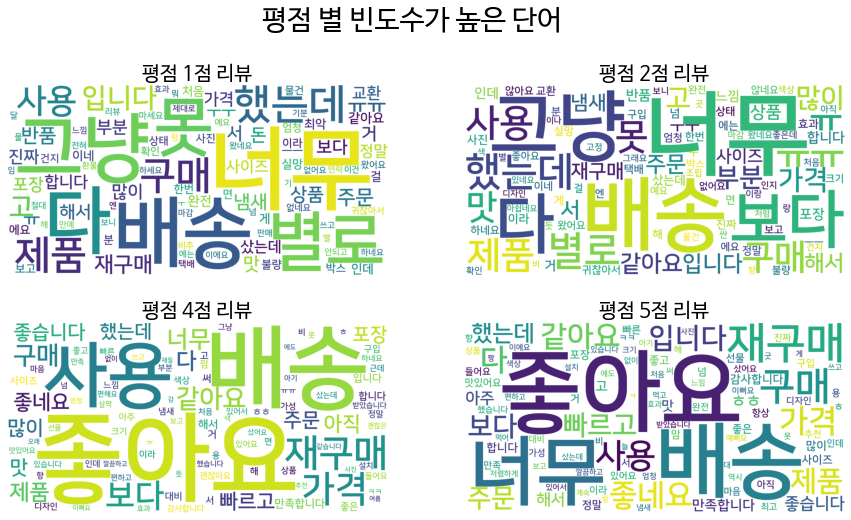

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for row in range(2):
    for col in range(2):
        label = labels[row*2+col]
        ax[row,col] = plot_words(word_dict[label],ax[row,col],f'평점 {label}점 리뷰')
plt.suptitle('평점 별 빈도수가 높은 단어', fontsize=28, y=1.01)
plt.show()

## 평점 별 리뷰수

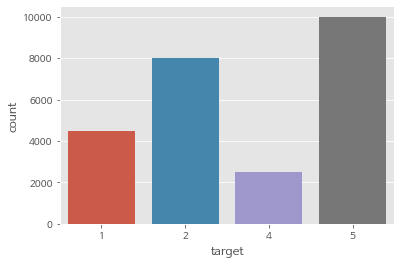

In [ ]:
sns.countplot(data=train,x='target')

# Data Process

In [ ]:
import re
from hanspell import spell_checker
from soynlp.normalizer import emoticon_normalize,only_text

In [ ]:
def preprocess_sentences(df:pd.DataFrame,column:str)->pd.DataFrame:
  data=df.copy()
  errors=list()

  data[column] = data[column].apply(lambda x: re.sub('\.*!+', '!', x))
  data[column] = data[column].apply(lambda x: re.sub('\.*\?+', '?', x))
  data[column] = data[column].apply(lambda x: re.sub(',+', ',', x))
  data[column] = data[column].apply(lambda x: re.sub('(,\.|\.,)', '..', x))
  data[column] = data[column].apply(lambda x: re.sub('\.{2,}', '...', x))
  data[column] = data[column].apply(lambda x: re.sub('[^A-Za-z0-9ㄱ-ㅎㅏ-ㅣ가-힣\s\[\]\.,!\?\"\']', '', x))
  data[column] = data[column].apply(lambda x: emoticon_normalize(only_text(x)))

  for i,review in tqdm(zip(data.index.tolist(),data[column].tolist()),total=len(data)):
    try:
      data[column][i]=spell_checker.check(review).checked
    except:
      errors.append(i)

  return data



In [ ]:
train_aug = preprocess_sentences(train, 'reviews')
test = preprocess_sentences(test, 'reviews')

  0%|          | 0/25000 [00:00<?, ?it/s]

  0%|          | 0/25000 [00:00<?, ?it/s]

In [ ]:
#null값 확인><
train[train_aug['reviews'].isna()]

,id,reviews,target


In [ ]:
train_aug.to_csv('train_aug.csv')
test.to_csv('test_preprocessed.csv')

In [26]:
train_aug.head(10)

,Unnamed: 0,id,reviews,target
0,0,0,좋아요 처음 구입 싸게 했어요,2
1,1,1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천 원가량 주고 사기 너무...,1
2,2,2,디자인은 괜찮은데 상품이 금이 가서 교환했는데 두 번째 받은 상품도 까져있고 안쪽에...,2
3,3,3,기전에 이 제품 말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. ...,2
4,4,4,튼튼하고 손목을 잘 받쳐주네요,5
5,5,5,배송은 먼저 구입하신 분들께서 오래 걸린다고 하여 참고 기다렸습니다 생각보다 일찍 ...,2
6,6,6,타이밍이 좋았는지 배송도 빠르고 맛있었어요! 크기가 두 가지가 있길래 큰 걸 사봤는...,5
7,7,7,상품 퀄리티가 좋지 않아요,2
8,8,8,재구매 평소 사용하던 제품이에요. 한 번에 쟁여두려 여러 개 삽니다.,5
9,9,9,두께 때문에 별로네요...,2


In [27]:
test.head(10)

,id,reviews
0,0,채소가 약간 시들어 있어요
1,1,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이없어서 들어 올리...
2,2,부들부들 좋네요 입어보고 시원하면 또 살게요
3,3,이런 1. 8 골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임?
4,4,검수도 없이 보내구 불량 배송비 5000원 청구하네요 완전별로 별하나도 아까워요
5,5,흠 마무리가 넘 안좋아요 가격대비 그냥써봅니다
6,6,조금 찌거러져서 왔지만 그냥 써야죠 뭐.. 신경 좀 써주세요.
7,7,잘 빠져요. 새다리들만 쓸수 있을듯해요.그냥 tv볼때 요거 위에다 다리올려놓고 봅니다.
8,8,재구매 가격저령하구요 상품질도 좋으네요~ 또이용하겠습니다
9,9,재구매 아이가 너무 좋아합니다 배송도 빠르고 사은품도 너무 좋네요~~


# Modeling

- 허깅페이스 트랜스포머 프레임워크를 활용해 다중 분류 작업을 위한 파이프라인 생성
- KoELECTRA 모델과 RoBERTa 모델에 대해 각각 학습 수행

In [62]:
train_aug=pd.read_csv('train_aug.csv')
test=pd.read_csv('/content/test_preprocessed.csv')

In [64]:
display(train_aug.head())
print()
display(test.head())

,id,reviews,target
0,0,좋아요 처음 구입 싸게 했어요,2
1,1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천 원가량 주고 사기 너무...,1
2,2,디자인은 괜찮은데 상품이 금이 가서 교환했는데 두 번째 받은 상품도 까져있고 안쪽에...,2
3,3,기전에 이 제품 말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. ...,2
4,4,튼튼하고 손목을 잘 받쳐주네요,5


,id,reviews
0,0,채소가 약간 시들어 있어요
1,1,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이 없어서 들어 올...
2,2,부들부들 좋네요 입어보고 시원하면 또 살게요
3,3,이런 1. 8 골드 주라니깐 파란 개 오네 회사 전화 걸어도 받지도 않고 머 하자는...
4,4,검수도 없이 보내고 불량 배송비 5000원 청구하네요 완전별로 별 하나도 아까워요


In [15]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 31.8 MB/s 
     |████████████████████████████████| 101 kB 10.3 MB/s 
     |████████████████████████████████| 6.6 MB 60.0 MB/s 
     |████████████████████████████████| 596 kB 53.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
pip install datasets#다시 런타임 돌려야함

In [48]:
import torch
from transformers import AutoTokenizer,AutoModelForSequenceClassification
from transformers import EarlyStoppingCallback,TrainingArguments,Trainer
from transformers.tokenization_utils_base import BatchEncoding
from transformers.trainer_utils import EvalPrediction
from datasets import load_dataset
from datasets.arrow_dataset import Dataset
from sklearn.metrics import accuracy_score


In [49]:
MAX_LEN=128
VALID_SPLIT=0.1
EPOCHS=2
LEARNING_RATE=1e-5
DR_RATE=0.3
WARMUP_STEPS=500
WEIGHT_DECAY=0.01
METRIC='accuracy'

device=torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

#KoELECTRA Training
MODEL_NAME='koelectra'
MODEL_PATH='jaehyeong/koelectra-base-v3-generalized-sentiment-analysis'
BATCH_SIZE=64

# RoBERTa Training
# MODEL_NAME = 'roberta'
# MODEL_PATH = 'klue/roberta-large'
# BATCH_SIZE = 32

## Load Datasets

In [65]:
LABELS=[1,2,4,5]
id2label={idx:label for idx,label in enumerate(LABELS)}
label2id={label:idx for idx,label in enumerate(LABELS)}
print(train_aug.shape)
train_aug.head()

(25000, 3)


,id,reviews,target
0,0,좋아요 처음 구입 싸게 했어요,2
1,1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천 원가량 주고 사기 너무...,1
2,2,디자인은 괜찮은데 상품이 금이 가서 교환했는데 두 번째 받은 상품도 까져있고 안쪽에...,2
3,3,기전에 이 제품 말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. ...,2
4,4,튼튼하고 손목을 잘 받쳐주네요,5


In [66]:
test.head()

,id,reviews
0,0,채소가 약간 시들어 있어요
1,1,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이 없어서 들어 올...
2,2,부들부들 좋네요 입어보고 시원하면 또 살게요
3,3,이런 1. 8 골드 주라니깐 파란 개 오네 회사 전화 걸어도 받지도 않고 머 하자는...
4,4,검수도 없이 보내고 불량 배송비 5000원 청구하네요 완전별로 별 하나도 아까워요


In [ ]:
train_aug.drop('Unnamed: 0',axis=1,inplace=True)
test.drop('Unnamed: 0',axis=1,inplace=True)

In [67]:
train_dataset=load_dataset('csv',data_files='/content/train_aug.csv',split='train')
test_dataset=load_dataset('csv',data_files='/content/test_preprocessed.csv',split='train')
train_dataset=train_dataset.train_test_split(test_size=VALID_SPLIT)
#clear_output()
print(train_dataset['train'].shape,train_dataset['test'].shape,test_dataset.shape)

(22500, 3) (2500, 3) (25000, 2)


In [71]:
display(train_dataset['train'])
print()
display(test_dataset)

Dataset({
    features: ['id', 'reviews', 'target'],
    num_rows: 22500
})

Dataset({
    features: ['id', 'reviews'],
    num_rows: 25000
})

## Tokenization

In [72]:
def tokenize(model_path: str) -> Callable[[Dataset],BatchEncoding]:
    tokenizer = AutoTokenizer.from_pretrained(model_path, problem_type='multi_label_classification')
    #clear_output()
    return lambda examples: tokenizer(examples['reviews'], max_length=MAX_LEN, padding='max_length', truncation=True)

def one_hot(examples: Dataset) -> Dict[str,np.ndarray]:
    return {'labels':np.eye(len(LABELS))[label2id[examples['target']]]}

def preprocess(data: Dataset, model_path: str, labeled=True) -> Dataset:
    encoded = data.map(tokenize(model_path), batched=True, remove_columns=['id','reviews'], load_from_cache_file=False)
    encoded = encoded.map(one_hot, remove_columns=['target'], load_from_cache_file=False) if labeled else encoded
    encoded.set_format('torch')
    return encoded

## Load Model

In [73]:
def model(model_path: str) -> AutoModelForSequenceClassification:
    model = AutoModelForSequenceClassification.from_pretrained(
        model_path,
        problem_type='multi_label_classification',
        ignore_mismatched_sizes=True,
        num_labels=len(LABELS),
        id2label=id2label,
        label2id=label2id,).to(device)
    #clear_output()

    return model

In [74]:
def compute_metrics(p:EvalPrediction)->Dict[str,float]:
  predictions,labels=p
  y_pred=np.argmax(predictions,axis=1)
  y_true=np.argmax(labels,axis=1)
  return{
      'accuracy':accuracy_score(y_true=y_true,y_pred=y_pred),
  }

## Load Trainer

In [75]:
from pathlib import Path

def make_dirs(name:str)->Dict[str,str]:
  output_dir = os.path.join('./saved/models', name)
  logging_dir = os.path.join('./saved/logger', name)
  exist_ok = name == ''
  Path(output_dir).mkdir(parents=True, exist_ok=exist_ok)
  Path(logging_dir).mkdir(parents=True, exist_ok=exist_ok)
  return output_dir, logging_dir

def training_args(model_name: str) -> TrainingArguments:
    output_dir, logging_dir = make_dirs(model_name)
    return TrainingArguments(
        output_dir=output_dir,
        evaluation_strategy='epoch',
        save_strategy='epoch',
        num_train_epochs=EPOCHS,
        per_device_train_batch_size=BATCH_SIZE,
        per_device_eval_batch_size=BATCH_SIZE,
        learning_rate=LEARNING_RATE,
        warmup_steps=WARMUP_STEPS,
        weight_decay=WEIGHT_DECAY,
        logging_dir=logging_dir,
        load_best_model_at_end=True,
        metric_for_best_model=METRIC,
    )

def trainer(dataset: Dataset, model_name: str, model_path: str, labeled=True) -> Trainer:
    data_loader = preprocess(dataset, model_path, labeled)

    return Trainer(
        model=model(model_path),
        args=training_args(model_name),
        train_dataset=data_loader['train'],
        eval_dataset=data_loader['test'],
        compute_metrics=compute_metrics,
        callbacks = [EarlyStoppingCallback(3)],
    )

In [55]:
koelectra_trainer=trainer(train_dataset,MODEL_NAME,MODEL_PATH)

  0%|          | 0/23 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/22500 [00:00<?, ?ex/s]

  0%|          | 0/2500 [00:00<?, ?ex/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at jaehyeong/koelectra-base-v3-generalized-sentiment-analysis and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([2, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
- classifier.out_proj.bias: found shape torch.Size([2]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Train

In [56]:
koelectra_trainer.train()

***** Running training *****
  Num examples = 22500
  Num Epochs = 2
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 704


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.379634,0.676000
2,0.507600,0.334085,0.691200


***** Running Evaluation *****
  Num examples = 2500
  Batch size = 64
Saving model checkpoint to ./saved/models/koelectra/checkpoint-352
Configuration saved in ./saved/models/koelectra/checkpoint-352/config.json
Model weights saved in ./saved/models/koelectra/checkpoint-352/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 2500
  Batch size = 64
Saving model checkpoint to ./saved/models/koelectra/checkpoint-704
Configuration saved in ./saved/models/koelectra/checkpoint-704/config.json
Model weights saved in ./saved/models/koelectra/checkpoint-704/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ./saved/models/koelectra/checkpoint-704 (score: 0.6912).


TrainOutput(global_step=704, training_loss=0.45880272171714087, metrics={'train_runtime': 949.28, 'train_samples_per_second': 47.404, 'train_steps_per_second': 0.742, 'total_flos': 2960052526080000.0, 'train_loss': 0.45880272171714087, 'epoch': 2.0})

## Evaluate

In [57]:
koelectra_trainer.evaluate()

***** Running Evaluation *****
  Num examples = 2500
  Batch size = 64


{'epoch': 2.0,
 'eval_accuracy': 0.6912,
 'eval_loss': 0.33408504724502563,
 'eval_runtime': 20.2368,
 'eval_samples_per_second': 123.537,
 'eval_steps_per_second': 1.977}

In [58]:
test_dataset = preprocess(test_dataset, MODEL_PATH, labeled=False)
result = koelectra_trainer.predict(test_dataset)
preds = np.vectorize(id2label.get)(np.argmax(result.predictions, axis=1))

loading configuration file https://huggingface.co/jaehyeong/koelectra-base-v3-generalized-sentiment-analysis/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/a5bdf974660f2abd485165587acd1288442013d2bf21b7dbc3a632ebf0503768.623b1f32a796a87d81f470b277bf2aad3469c70d06aa08352bdb8cb7a8421de3
Model config ElectraConfig {
  "_name_or_path": "jaehyeong/koelectra-base-v3-generalized-sentiment-analysis",
  "architectures": [
    "ElectraForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "embedding_size": 768,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "0",
    "1": "1"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "0": 0,
    "1": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "electra",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_ty

  0%|          | 0/25 [00:00<?, ?ba/s]

***** Running Prediction *****
  Num examples = 25000
  Batch size = 64


## Compare Models

koelectra만 사용해서 비교할 모델이 없음

- 다양한 조건에 대해 학습한 모델의 성능을 비교
- 모델 종류 학습데이터, 테스트 데이터에 따른 정확도 각각 시간화

In [76]:
import json

def read_history(model_names: List[str], metric: str, root_dir: str) -> pd.DataFrame:
    history = dict()
    metric = f'eval_{metric}'

    for model_name in model_names:
        output_dir = os.path.join(root_dir, model_name)
        checkpoints = [ckp for ckp in os.listdir(output_dir) if re.match('checkpoint-[0-9]+', ckp)]
        recent_checkpoint = sorted(checkpoints, key=lambda x: int(x.split('-')[1]))[-1]
        trainer_state = os.path.join(output_dir, recent_checkpoint,'trainer_state.json')

        with open(trainer_state) as f:
            log_history = json.load(f)['log_history']

        history[model_name] = {'epoch'+str(int(log['epoch'])):round(log[metric],5) for log in log_history if log.get(metric)}

    return pd.DataFrame(history)

In [77]:
def plot_history(history: pd.DataFrame, metric: str, title: Optional[str]=None,
                legend: Optional[str]='epoch', ymin: Optional[float]=0., ymax: Optional[float]=1.) -> Axes:

    accuracy = history.values.reshape(-1).tolist()
    epoch = np.array([[e]*len(history.columns) for e in history.index]).reshape(-1).tolist()
    model = history.columns.tolist()*len(history)

    history = pd.DataFrame({metric:accuracy, legend:epoch, 'model':model})
    ax = sns.barplot(data=history, x='model', y=metric, hue=legend)

    if title:
        ax.set_title(title, fontsize=16)

    if ymin > 0. or ymax < 1.:
        ax.set_ylim(ymin=ymin, ymax=ymax)

    return ax

In [79]:
#compare_list = ['koelectra_jaehyeong','koelectra_v3','koelectra_ner','roberta_large']
compare_list = ['koelectra']
history = read_history(compare_list, METRIC, root_dir='./saved/models')
history

,koelectra
epoch1,0.6760
epoch2,0.6912


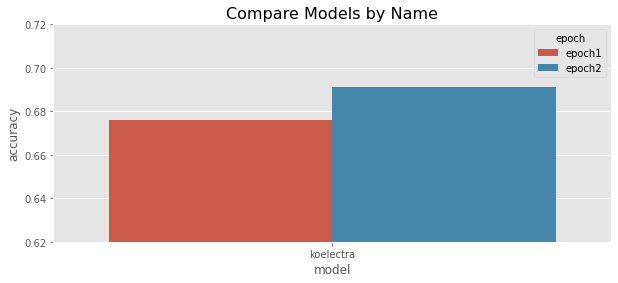

In [84]:
fig = plt.figure(figsize=(10,4))
plot_history(history, METRIC, title='Compare Models by Name', ymin=0.62, ymax=0.72)
plt.show()

### compare models by train data

In [79]:
compare_list=['']

In [82]:
sample.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [83]:
sample['target']=preds
sample.head()

,id,target
0,0,2
1,1,2
2,2,5
3,3,1
4,4,1
